<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 03: NYC 311 Service Request Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

In [1]:
## Import Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


LOADING DATA

In [2]:
NYC_311_data = pd.read_csv('C:\\Users\\samira\\Desktop\\311_Service_Requests_from_2010_to_Present.csv')

C:\Users\samira\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


 EXPLORING DATA
 

In [3]:
### VIEW SHAPE, DATA TYPE AND STATISTICAL DETAILS

In [4]:
NYC_311_data.shape

(364558, 53)

In [5]:
NYC_311_data.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [6]:
NYC_311_data.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


FIND PATTERNS

In [7]:
NYC_311_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 23:59,1/1/2016 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 23:59,1/1/2016 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 23:59,1/1/2016 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 23:57,1/1/2016 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 23:56,1/1/2016 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [8]:
NYC_311_data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

DISPLAY THE COMPLAINT TYPE AND CITY TOGETHER

In [9]:
NYC_311_data[['Complaint Type','City']]

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST
5,Illegal Parking,BROOKLYN
6,Illegal Parking,NEW YORK
7,Blocked Driveway,BRONX
8,Illegal Parking,KEW GARDENS
9,Blocked Driveway,BROOKLYN


FINDING MAJOR COMPLAINT TYPES

In [10]:
# COMPLAINT TYPES By Group
Complaint_Type_Group = NYC_311_data.dropna(subset=['Complaint Type'])
Complaint_Type_Group = NYC_311_data.groupby('Complaint Type').size()
Complaint_Type_Group

Complaint Type
Agency Issues                     8
Animal Abuse                  10541
Animal in a Park                  1
Bike/Roller/Skate Chronic       478
Blocked Driveway             100881
Derelict Vehicle              21661
Disorderly Youth                315
Drinking                       1409
Ferry Complaint                   2
Graffiti                        157
Homeless Encampment            4879
Illegal Fireworks               172
Illegal Parking               92679
Noise - Commercial            44109
Noise - House of Worship       1070
Noise - Park                   4109
Noise - Street/Sidewalk       51692
Noise - Vehicle               19352
Panhandling                     327
Posting Advertisement           681
Squeegee                          4
Traffic                        5198
Urinating in Public             641
Vending                        4192
dtype: int64

In [11]:
# Top ten Complaint Types

In [12]:
MajorComplaint = Complaint_Type_Group.nlargest(10)
MajorComplaint

Complaint Type
Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
dtype: int64

PLOT A BAR GRAPH OF COUNTS VS. COMPLAINT TYPES

MAJOR COMPLAINT TYPES AND THEIR COUNT

Text(0,0.5,'COUNT')

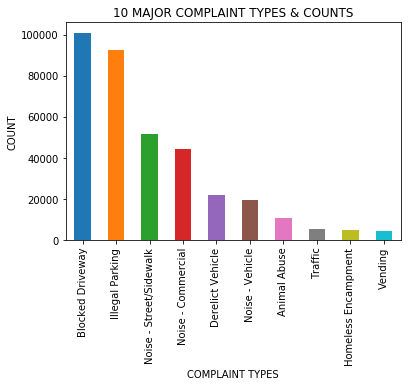

In [13]:
MajorComplaint.plot.bar()

plt.title('10 MAJOR COMPLAINT TYPES & COUNTS')
plt.xlabel('COMPLAINT TYPES')
plt.ylabel('COUNT')

THE LONGITUDE AND THE LATITUDE OF NYC

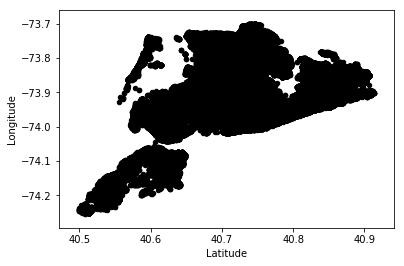

In [14]:
### USING SCATTER PLOT

NYC_311_data.plot.scatter(x='Latitude',y='Longitude', color='black')






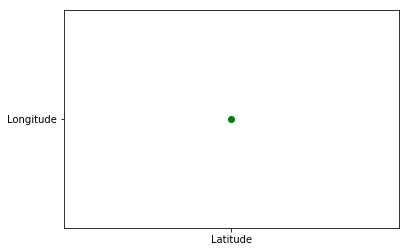

In [15]:
plt.scatter(x='Latitude',y='Longitude', alpha=1,color= 'g')

<function matplotlib.pyplot.show(*args, **kw)>

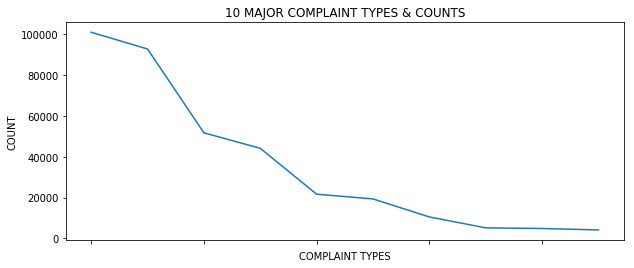

In [16]:
MajorComplaint.plot(figsize=(10,4) )

plt.title('10 MAJOR COMPLAINT TYPES & COUNTS')
plt.xlabel('COMPLAINT TYPES')
plt.ylabel('COUNT')

plt.show

In [18]:
import seaborn as sns

sns.pairplot(MajorComplaint.dropna())

TypeError: 'data' must be pandas DataFrame object, not: <class 'pandas.core.series.Series'>

In [37]:
extract = NYC_311_data.head().dropna(axis=1)
print(type(extract))

<class 'pandas.core.frame.DataFrame'>


In [36]:
extract=[data =['Complaint Type'],index=['Created Date']]

SyntaxError: invalid syntax (<ipython-input-36-0055e59510bf>, line 1)